In [2]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import *

ICM: (2, 6103)
Disagreement: (2, 6103)
E3B: (2, 6102)
RND: (2, 6103)
PseudoCounts: (2,)
RIDE: (2,)
RE3: (2, 6102)
NGU: (2,)
Extrinsic: (2, 6102)


/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_data[algo] = np.array(all_data[algo])
/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_data[algo] = np.array(all_data[algo])
/var/folders/qy/nrh63j5j40d22qjyh16q40yc0000gn/T/ipykernel_17069/1939252055.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

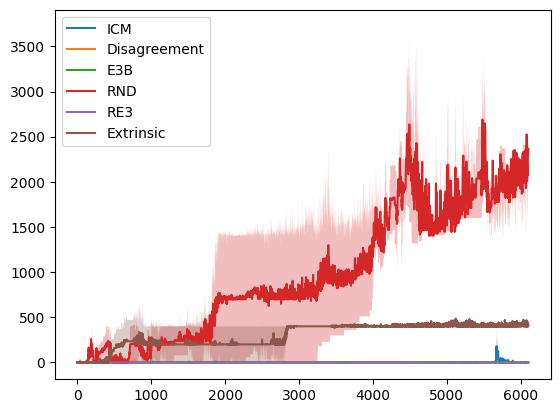

In [7]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
root = f"/Users/yuanmingqi/Downloads/nips2024_data/atariRuns/montezuma"
all_data = {algo: [] for algo in algos}

for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}/"
            file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
            data = pd.read_csv(file)['episode_reward']
            # data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    print(f"{algo}: {all_data[algo].shape}")

for algo in algos:
    try:
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        plt.plot(mean, label=algo)
        plt.fill_between(np.arange(mean.shape[0]), mean - std, mean + std, alpha=0.3)
    except:
        pass
plt.legend()

RND: (3, 9256)
Extrinsic: (3, 9256)


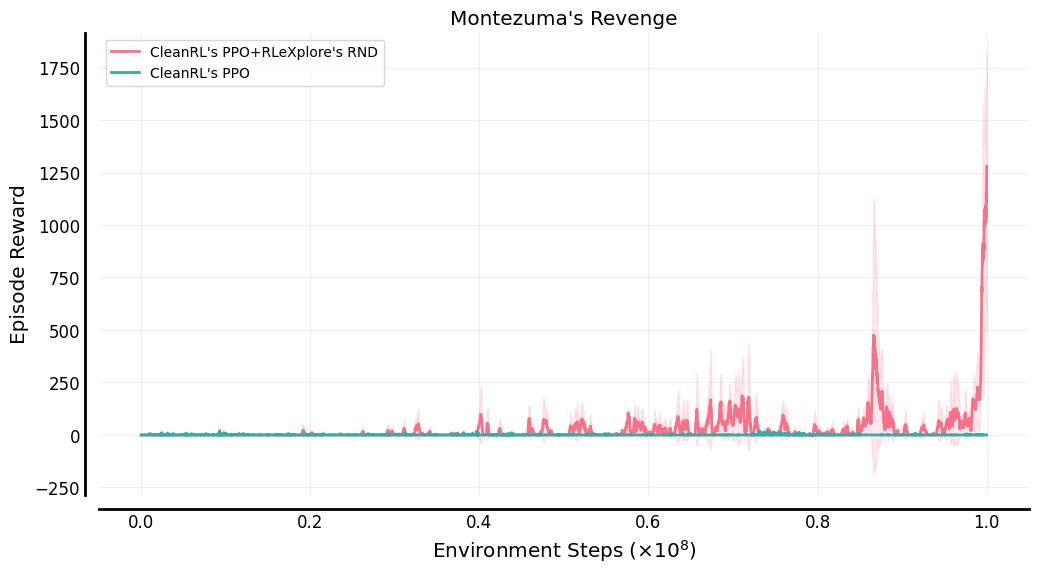

In [17]:
# algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
algos = ['RND', 'Extrinsic']
legends = ["CleanRL's PPO+RLeXplore's RND", "CleanRL's PPO"]
root = f"./data/new_atari"
colors = sns.husl_palette(len(algos))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

all_data = {algo: [] for algo in algos}

for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}"
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, 9256, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    print(f"{algo}: {all_data[algo].shape}")
    if all_data[algo].shape[0] == 0:
        all_data[algo] = np.zeros((3, 9256))


fig, ax = plt.subplots(figsize=(12, 6))
xticks = np.linspace(0, 1, 9256)
for algo_idx, algo in enumerate(algos):
    mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)

    ax.plot(xticks, mean, label=legends[algo_idx], color=colors[algo_idx], linewidth=2)
    ax.fill_between(xticks, mean - std, mean + std, alpha=0.15, color=colors[algo_idx])
    ax.set_title("Montezuma's Revenge", fontsize="x-large")

    ax = _annotate_and_decorate_axis(ax,
                                    ticklabelsize="large",
                                        xticklabels=xticks,
                                            xlabel=r"Environment Steps ($\times 10^8$)", 
                                            ylabel="Episode Reward",
                                            )

plt.legend(loc="upper left")
# fig.legend(fake_patches, legends, loc='upper center', 
#     fancybox=True, ncol=len(legends), 
#     fontsize='x-large',
#     bbox_to_anchor=(0.5, 1.0))
fig.savefig('figure_atari_curves.pdf', bbox_inches='tight', dpi=300, transparent=True)

In [ ]:
# algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
algos = ['RND', 'Extrinsic']
legends = ["CleanRL's PPO+RLeXplore", "CleanRL's PPO"]
root = f"./data/new_atari"
colors = sns.husl_palette(len(legends))
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(legends[:1])]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

all_data = {algo: [] for algo in algos}
fig, axes = plt.subplots(2, 4, figsize=(32, 14))


for algo in algos:
    for dir in os.listdir(root):
        if algo.lower() in dir:
            file = f"{root}/{dir}"
            data = pd.read_csv(file)['episode_reward']
            data = data[np.linspace(0, data.shape[0]-1, 9256, dtype=int)]
            all_data[algo].append(data)

    all_data[algo] = np.array(all_data[algo])
    print(f"{algo}: {all_data[algo].shape}")
    if all_data[algo].shape[0] == 0:
        all_data[algo] = np.zeros((3, 9256))


# fig, ax = plt.subplots()
xticks = np.linspace(0, 1, 9256)
for algo_idx, algo in enumerate(algos[:-1]):
    ax = axes.flatten()[algo_idx]
    mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)

    ax.axhline(y=np.max(all_data['Extrinsic']), color='k', linestyle='--', linewidth=2, label="CleanRL's PPO")
    ax.plot(xticks, mean, label=["CleanRL's PPO+RLeXplore"], color=colors[0])
    ax.fill_between(xticks, mean - std, mean + std, alpha=0.15, color=colors[0])

    ax.set_ylim([0, 2000])
    ax.set_title(algos[algo_idx], fontsize="x-large")

    ax = _annotate_and_decorate_axis(ax,
                                    ticklabelsize="large",
                                        xticklabels=xticks,
                                            xlabel=r"Environment Steps ($\times 10^8$)", 
                                            ylabel="Episode Reward",
                                            )

fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(legends), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 1.0))
# fig.savefig('figure_atari_curves.svg', bbox_inches='tight', dpi=300, transparent=True)